In [1]:
from pathlib import Path
import pandas as pd

%matplotlib inline

In [2]:
# Get a list of the CSV files in the source directory.
!ls data/source

RescueTime_Report_Productivity__by_day_2019-01-01.csv
RescueTime_Report_Productivity__by_day_2019-02-01.csv
RescueTime_Report_Productivity__by_day_2019-03-01.csv
RescueTime_Report_Productivity__by_day_2019-04-01.csv
RescueTime_Report_Productivity__by_day_2019-05-01.csv


In [3]:
# Combine all the CSV files into one DataFrame.

dfs = []

for file_path in Path("data/source/").glob("RescueTime_Report_Productivity__by_day_2019-*-01.csv"):
    file_path.resolve()
    dfs.append(pd.read_csv(file_path.as_posix(), parse_dates=["Date"]))

df = pd.concat(dfs)

df.head()

,Date,Time Spent (seconds),Time Spent (HH:MM:SS),Number of People,Productivity
0,2019-01-01,4364,01:12:44,1,-2
1,2019-01-01,2306,00:38:26,1,2
2,2019-01-01,1349,00:22:29,1,0
3,2019-01-01,681,00:11:21,1,1
4,2019-01-01,142,00:02:22,1,-1


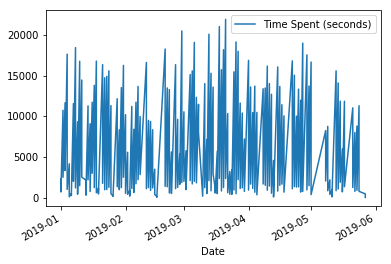

In [4]:
df[df["Productivity"] >= 1].plot(x="Date", y=["Time Spent (seconds)"])

In [14]:
# Get all the busienss days between the oldest to newest dates.

business_days = pd.date_range(
    df["Date"].min(),
    df["Date"].max(), freq='B'
).to_series()

business_days.head()

2019-01-01   2019-01-01
2019-01-02   2019-01-02
2019-01-03   2019-01-03
2019-01-04   2019-01-04
2019-01-07   2019-01-07
Freq: B, dtype: datetime64[ns]

In [17]:
# Filter DataFrame by the business days.

df = df[df["Date"].isin(business_days)]

df.head()

,Date,Time Spent (seconds),Time Spent (HH:MM:SS),Number of People,Productivity
0,2019-01-01,4364,01:12:44,1,-2
1,2019-01-01,2306,00:38:26,1,2
2,2019-01-01,1349,00:22:29,1,0
3,2019-01-01,681,00:11:21,1,1
4,2019-01-01,142,00:02:22,1,-1


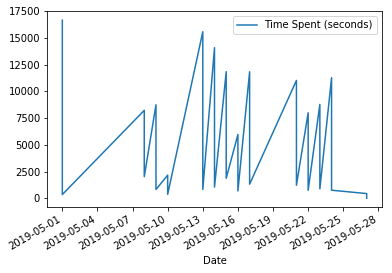

In [24]:
df[
    (df["Productivity"] >= 1) &
    (df["Date"].map(lambda x: x.month) == 5)
].plot(
    x="Date",
    y=["Time Spent (seconds)"]
)

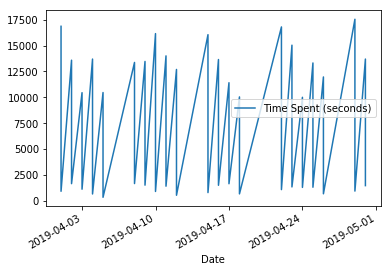

In [25]:
df[
    (df["Productivity"] >= 1) &
    (df["Date"].map(lambda x: x.month) == 4)
].plot(
    x="Date",
    y=["Time Spent (seconds)"]
)